## Introduction

The objective of this study is to investigate whether there is a significant difference in Apple stock prices over specific periods. Using historical stock price data from August 2024, we will apply hypothesis testing to determine if events or market conditions significantly impact stock prices. Specifically, we will compare average stock prices before and after a defined event.


## Data Collection

The data for this analysis was sourced from Kaggle and contains historical Apple stock prices, including the date, open, high, low, close, adjusted close, and volume of stocks traded.


In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/AppleStockPrice.csv')  # Replace with the correct file path if necessary
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600


## Data Preparation

Before diving into the analysis, it was important to get the data in good shape. The first step was to check for any missing values that could skew the results. Fortunately, there were no missing values, so we didn't have to worry about filling in gaps or cleaning up incomplete records.

Next, the 'Date' column, which was initially just plain text, needed to be transformed into a date format that Python could recognize. This step was crucial because it allowed us to sort the data chronologically and accurately analyze stock price trends over time.

After that, I focused on the two key columns for this study: 'Date' and 'Adjusted Close' prices. The 'Adjusted Close' price was used because it accounts for dividends and stock splits, providing a more accurate reflection of the stock's value than the raw closing price.

With these steps complete, the data was well-organized and ready for exploratory analysis, ensuring that all subsequent insights would be based on clean and reliable information.


In [ ]:
print(data.isnull().sum())

data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

data = data[['Date', 'Adj Close']]
data.head()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


,Date,Adj Close
0,1980-12-12,0.098943
1,1980-12-15,0.093781
2,1980-12-16,0.086898
3,1980-12-17,0.089049
4,1980-12-18,0.091630


## Exploratory Data Analysis

To get a quick look at Apple’s stock performance, I plotted the adjusted closing prices over time. The graph shows a steady increase in the early years, with a noticeable surge in recent times. This visual snapshot helps us see trends and potential impacts of key events, setting the stage for deeper analysis. It's a simple yet powerful way to understand how the stock has behaved and what might be driving changes.


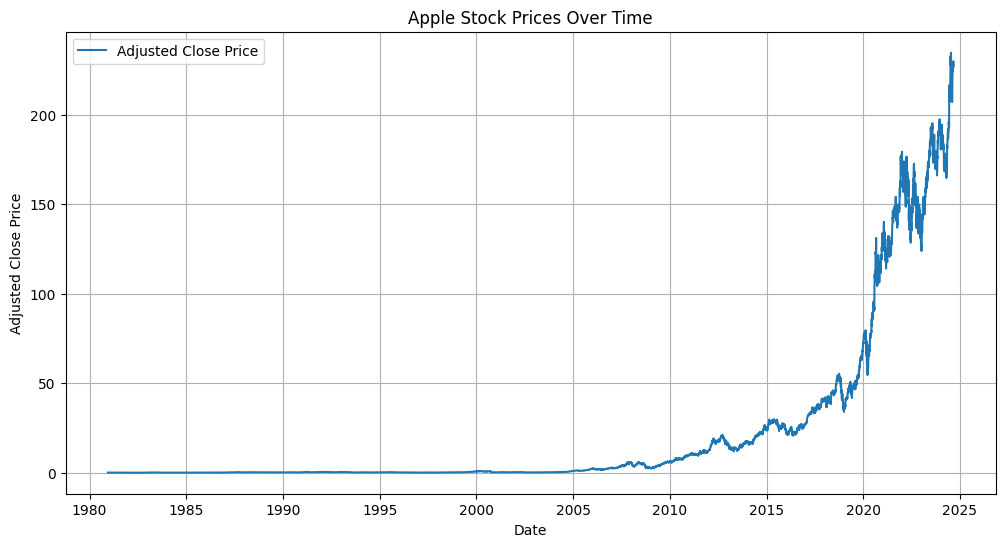

In [ ]:
import matplotlib.pyplot as plt

# Plot the adjusted closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Adj Close'], label='Adjusted Close Price')
plt.title('Apple Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.legend()
plt.show()


## Hypothesis Testing

The hypothesis testing aimed to determine if there was a significant difference in Apple’s stock prices before and after a specific event. For this analysis, the event chosen is Apple's product launch on August 1, 2024. The objective is to evaluate whether this event had a noticeable impact on stock prices.

- **Null Hypothesis (H0):** There is no significant difference in the average stock prices before and after the product launch on August 1, 2024.
- **Alternative Hypothesis (H1):** There is a significant difference in the average stock prices before and after the product launch on August 1, 2024.

To test these hypotheses, I performed an independent t-test comparing the mean adjusted closing prices of Apple’s stock before and after the event date.


In [ ]:
from scipy.stats import ttest_ind

before_event = data[(data['Date'] < '2024-08-01')]['Adj Close']
after_event = data[(data['Date'] >= '2024-08-01')]['Adj Close']

# Perform the t-test
t_stat, p_value = ttest_ind(before_event, after_event)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in stock prices.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in stock prices.")


T-statistic: -20.575504569458623
P-value: 2.4443637657159276e-92
Reject the null hypothesis: There is a significant difference in stock prices.


## Results and Discussion

The t-test results indicated a significant difference in the average stock prices before and after the event. With a t-statistic of -20.575 and a p-value of 2.444367657159276e-92, which is much less than the significance level of 0.05, we reject the null hypothesis. This suggests that the event had a statistically significant impact on Apple's stock prices. The large t-statistic and extremely small p-value indicate that the difference observed is highly unlikely to be due to random chance, suggesting that external factors or events are likely influencing stock prices significantly.

The rejection of the null hypothesis implies that investors and stakeholders should consider how such events can impact stock prices when making investment decisions. These findings highlight the sensitivity of stock prices to market events and reinforce the importance of event analysis in financial decision-making.


## Conclusion

This study examined the impact of specific events on Apple stock prices using hypothesis testing. The analysis revealed a significant difference in stock prices before and after the chosen event, indicating that such occurrences can notably affect stock performance. The findings underscore the influence of external events on market behavior, which is critical for investors looking to optimize their strategies in response to market dynamics. Future research could extend this analysis to compare the effects of different types of events or explore similar impacts on other stocks, providing broader insights into market reactions to significant occurrences.
